<h1>Logistic Regression Examples<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#libraries" data-toc-modified-id="libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>libraries</a></span></li><li><span><a href="#Binary-class" data-toc-modified-id="Binary-class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Binary class</a></span></li><li><span><a href="#Multiclass-with-polynomial-feature" data-toc-modified-id="Multiclass-with-polynomial-feature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiclass with polynomial feature</a></span></li><li><span><a href="#Iris-Dataset" data-toc-modified-id="Iris-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Iris Dataset</a></span><ul class="toc-item"><li><span><a href="#With-polynomial-features" data-toc-modified-id="With-polynomial-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>With polynomial features</a></span></li></ul></li></ul></div>

## libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import spkit
print(spkit.__version__)

0.0.9


In [3]:
from spkit.ml import LogisticRegression

## Binary class

(300, 2) (300,)


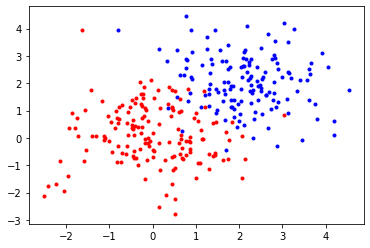

In [4]:
N = 300
np.random.seed(1)
X = np.random.randn(N,2)
y = np.random.randint(0,2,N)
y.sort()

X[y==0,:]+=2 # just creating classes a little far
print(X.shape, y.shape)
plt.plot(X[y==0,0],X[y==0,1],'.b')
plt.plot(X[y==1,0],X[y==1,1],'.r')
plt.show()

In [5]:
clf = LogisticRegression(alpha=0.1)
clf.fit(X,y,max_itr=1000)
yp  = clf.predict(X)
ypr = clf.predict_proba(X)
print('Accuracy : ',np.mean(yp==y))
print('Loss     : ',clf.Loss(y,ypr))

Accuracy :  0.96
Loss     :  0.07046678918015


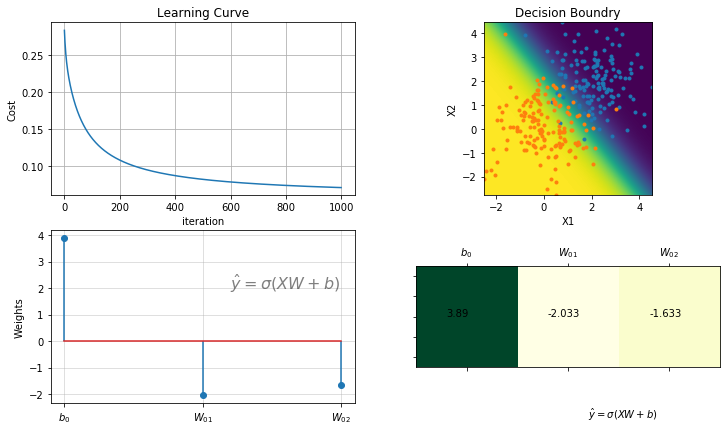

In [6]:
plt.figure(figsize=(12,7))
ax1 = plt.subplot(221) 
clf.plot_Lcurve(ax=ax1)
ax2 = plt.subplot(222)
clf.plot_boundries(X,y,ax=ax2)

ax3 = plt.subplot(223)
clf.plot_weights(ax=ax3)
ax4 = plt.subplot(224)
clf.plot_weights2(ax=ax4,grid=False)

## Multiclass with polynomial feature

(300, 2) (300,)


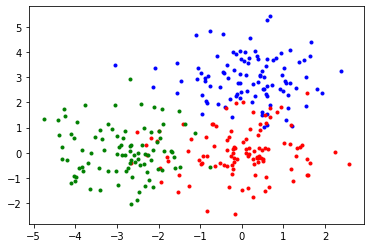

In [7]:
N =300
X = np.random.randn(N,2)
y = np.random.randint(0,3,N)
y.sort()

X[y==0,1]+=3
X[y==2,0]-=3
print(X.shape, y.shape)

plt.plot(X[y==0,0],X[y==0,1],'.b')
plt.plot(X[y==1,0],X[y==1,1],'.r')
plt.plot(X[y==2,0],X[y==2,1],'.g')
plt.show()

In [8]:
clf = LogisticRegression(alpha=0.1,polyfit=True,degree=3,lambd=0,FeatureNormalize=True)
clf.fit(X,y,max_itr=1000)
yp  = clf.predict(X)
ypr = clf.predict_proba(X)
print(clf)
print('')
print('Accuracy : ',np.mean(yp==y))
print('Loss     : ',clf.Loss(clf.oneHot(y),ypr))

LogisticRegression(alpha=0.1,lambd=0,polyfit=True,degree=3,FeatureNormalize=True,
	 penalty=l2,tol=0.01,rho=0.9,C=1.0,fit_intercept=True)

Accuracy :  0.89
Loss     :  0.07928431824494167


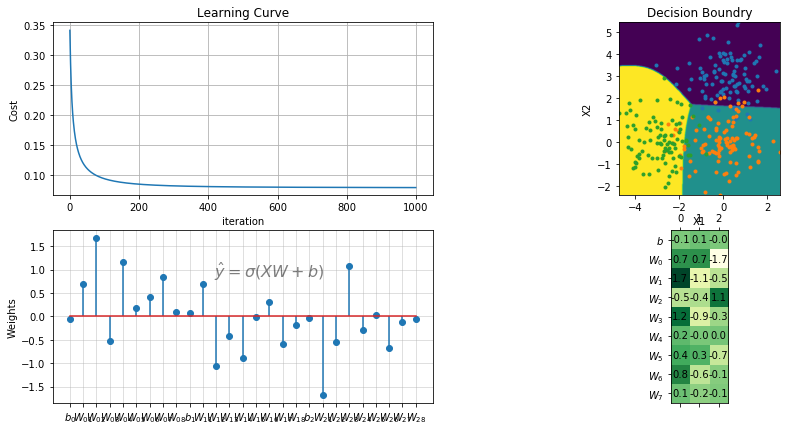

In [9]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(221) 
clf.plot_Lcurve(ax=ax1)
ax2 = plt.subplot(222)
clf.plot_boundries(X,y,ax=ax2)

ax3 = plt.subplot(223)
clf.plot_weights(ax=ax3)
ax4 = plt.subplot(224)
clf.plot_weights2(ax=ax4,grid=True)

## Iris Dataset

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [11]:
data = datasets.load_iris()
X = data.data
y = data.target

Xt,Xs, yt, ys = train_test_split(X,y,test_size=0.3)

print(X.shape,y.shape, Xt.shape, yt.shape, Xs.shape, ys.shape)

(150, 4) (150,) (105, 4) (105,) (45, 4) (45,)


### With polynomial features

In [12]:
clf = LogisticRegression(alpha=0.1,polyfit=False,degree=3,lambd=0,FeatureNormalize=False)
clf.fit(Xt,yt,max_itr=1000)

ytp  = clf.predict(Xt)
ytpr = clf.predict_proba(Xt)

ysp  = clf.predict(Xs)
yspr = clf.predict_proba(Xs)

print(clf)

print('')
print('Training Accuracy : ',np.mean(ytp==yt))
print('Testing  Accuracy : ',np.mean(ysp==ys))
print('Training Loss     : ',clf.Loss(clf.oneHot(yt),ytpr))
print('Testing  Loss     : ',clf.Loss(clf.oneHot(ys),yspr))

LogisticRegression(alpha=0.1,lambd=0,polyfit=False,degree=3,FeatureNormalize=False,
	 penalty=l2,tol=0.01,rho=0.9,C=1.0,fit_intercept=True)

Training Accuracy :  0.9714285714285714
Testing  Accuracy :  0.9777777777777777
Training Loss     :  0.043725808138330415
Testing  Loss     :  0.03776786129832712


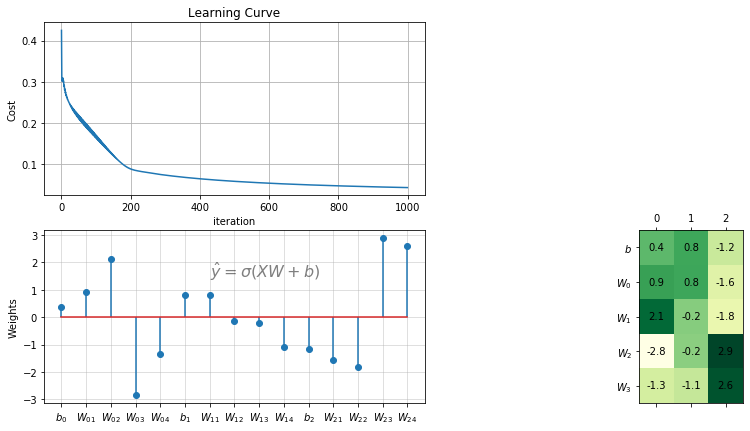

In [13]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(221) 
clf.plot_Lcurve(ax=ax1)
ax3 = plt.subplot(223)
clf.plot_weights(ax=ax3)
ax4 = plt.subplot(224)
clf.plot_weights2(ax=ax4,grid=True)